### **Iris Dataset Presentation**

The Iris dataset is one of the most famous datasets in the fields of machine learning and statistics. It was introduced by Ronald Fisher in 1936 as an example of discriminant analysis. This dataset consists of 150 instances containing measurements of the characteristics of three iris flower species (Iris setosa, Iris virginica, and Iris versicolor). Each instance includes four attributes: sepal length, sepal width, petal length, and petal width, all measured in centimeters. In addition to these four attributes, there is a label column ${0,1,2}$ indicating the iris species.

This dataset is frequently used in classification tasks, particularly for supervised learning techniques, where the goal is to predict the iris species based on the flower’s characteristic measurements

### Iris Dataset Columns

The Iris dataset consists of five main columns, each describing a different characteristic of iris flowers. Below is a summary of each column:

*   Sepal Length: Measures the length of each flower’s sepal in centimeters. The sepal is the part that protects the flower bud before it opens.

*   Sepal Width: Measures the width of each flower’s sepal in centimeters. Along with length, width is an important indicator of the flower’s physical characteristics.

*    Petal Length: Measures the length of each flower’s petal in centimeters. Petals are the colorful parts of flowers that are most noticeable and attract pollinators.

*   Petal Width: Measures the width of each flower’s petal in centimeters. The petal width, together with its length, can be crucial in determining the iris species.

*   Species: This is the label column that identifies which of the three species each iris sample belongs to. The species included in the dataset are Iris setosa, Iris versicolor, and Iris virginica.

### **The Problem to Solve with the Perceptron**

The problem we aim to solve using the perceptron involves classifying iris species based on their morphological characteristics. Specifically, we will use the perceptron to distinguish between two of the three iris species in the dataset. Since the perceptron is a binary classifier, we will initially work with two species (e.g., Iris setosa and Iris versicolor).

The perceptron is one of the simplest artificial neural network models and serves as the foundation for more complex algorithms. It is used to learn a hyperplane that separates two classes in a feature space. Learning occurs through the iterative adjustment of weights assigned to each feature, based on classification errors observed during training.

Throughout this notebook, we will explore how the perceptron works, how it can be implemented using NumPy, and how it performs in classifying iris species based on their characteristics.




In [82]:
# Import necessary libraries
import numpy as np  # Library for numerical operations on arrays and matrices
import matplotlib.pyplot as plt  # Library for creating plots and visualizations
from sklearn import datasets  # Module for loading predefined datasets
from sklearn.model_selection import (
    train_test_split,
)  # Function to split data into training and testing sets
from sklearn.preprocessing import StandardScaler  # Tool for data normalization
from sklearn.metrics import accuracy_score  # Function to calculate model accuracy

#### Some results with random initialization and without training

In [83]:
# Load the Iris dataset
iris = datasets.load_iris()  # Load the Iris dataset from sklearn
X = iris.data  # Feature matrix of the dataset
y = iris.target  # Corresponding target vector

# Filter to obtain only classes 0 and 2
indices = np.where((y == 0) | (y == 2))  # Locate indices of classes 0 and 2
X = X[indices]  # Filter X to include only samples of classes 0 and 2
y = y[indices]  # Filter y in the same way

# Since the original dataset encodes Iris Setosa as 0 and Iris Virginica as 2,
# you may want to re-encode the labels for simplicity (optional):
y = np.where(y == 2, 1, 0)  # Re-encode class 2 as 1, class 0 remains 0
# This simplifies the problem to a binary classification between classes 0 and 1.

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
y_train = y_train.astype(float)
y_test = y_test.astype(float)
# test_size=0.2 means that 20% of the data will be used for testing, the rest for training.
# random_state=42 ensures reproducibility, always using the same split.

# Normalize the data for better model performance
scaler = StandardScaler()  # Initialize the StandardScaler object
X_train = scaler.fit_transform(
    X_train
)  # Compute mean and standard deviation and transform the training data
X_test = scaler.transform(X_test)  # Apply the same transformation to the test data

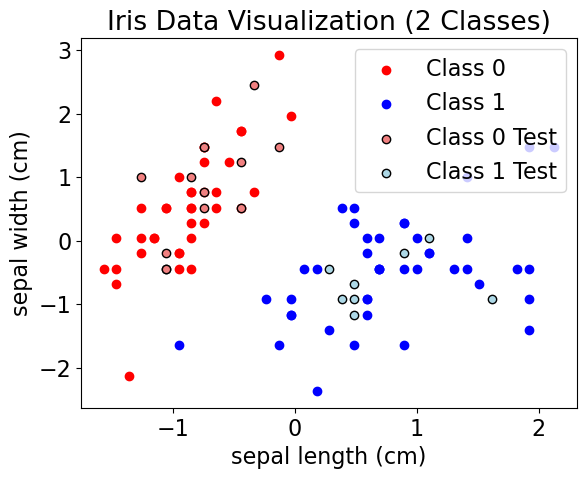

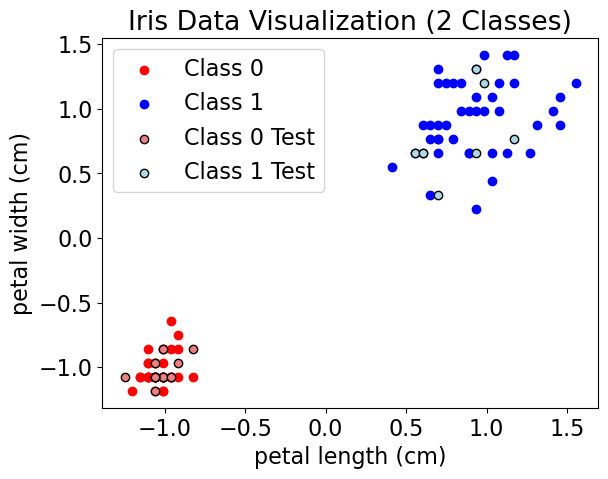

In [84]:
# Set font properties
plt.rcParams.update({"font.size": 16})

# Plot the decision boundary and points
plt.figure()

# Plot training data
plt.scatter(
    X_train[y_train == 0][:, 0],
    X_train[y_train == 0][:, 1],
    color="red",
    label="Class 0",
)
plt.scatter(
    X_train[y_train == 1][:, 0],
    X_train[y_train == 1][:, 1],
    color="blue",
    label="Class 1",
)

# Plot test data
plt.scatter(
    X_test[y_test == 0][:, 0],
    X_test[y_test == 0][:, 1],
    color="lightcoral",
    label="Class 0 Test",
    edgecolor="k",
)
plt.scatter(
    X_test[y_test == 1][:, 0],
    X_test[y_test == 1][:, 1],
    color="lightblue",
    label="Class 1 Test",
    edgecolor="k",
)

plt.xlabel(f"{iris.feature_names[0]}")
plt.ylabel(f"{iris.feature_names[1]}")
plt.title("Iris Data Visualization (2 Classes)")
plt.legend()
plt.show()

# Plot training data
plt.scatter(
    X_train[y_train == 0][:, 2],
    X_train[y_train == 0][:, 3],
    color="red",
    label="Class 0",
)
plt.scatter(
    X_train[y_train == 1][:, 2],
    X_train[y_train == 1][:, 3],
    color="blue",
    label="Class 1",
)

# Plot test data
plt.scatter(
    X_test[y_test == 0][:, 2],
    X_test[y_test == 0][:, 3],
    color="lightcoral",
    label="Class 0 Test",
    edgecolor="k",
)
plt.scatter(
    X_test[y_test == 1][:, 2],
    X_test[y_test == 1][:, 3],
    color="lightblue",
    label="Class 1 Test",
    edgecolor="k",
)

plt.xlabel(f"{iris.feature_names[2]}")
plt.ylabel(f"{iris.feature_names[3]}")
plt.title("Iris Data Visualization (2 Classes)")
plt.legend()
plt.show()

Separating data into training and testing sets is an essential practice in machine learning to ensure that a model can generalize well to new data, i.e., to correctly predict or classify data that was not used during training. Here are the main reasons and benefits of this separation:

### 1. **Prevention of Overfitting**
- **Overfitting** occurs when a machine learning model learns the details and noise in the training data to such an extent that it negatively impacts its performance on new data. An overfitted model performs very well on training data but poorly on unseen data because it becomes overly complex, capturing patterns that are not generalizable.
- Separating the test data helps detect overfitting by providing a metric of how well the model performs on new information.

### 2. **Realistic Performance Evaluation**
- The test set provides an unbiased way to evaluate the effectiveness of a model. When we use training data for evaluation, we risk obtaining an optimistic and unrealistic estimate of the model's performance.
- Test data, being independent of the training data, allows testing whether the model's inferences are valid outside the original dataset. This is crucial for practical applications where the model needs to operate with data it has never seen.

### 3. **Hyperparameter Tuning**
- Hyperparameters are settings that are not learned directly from the training process. Examples include the learning rate, the number of layers in a neural network, or the number of neighbors in K-Nearest Neighbors.
- A separate validation set, often taken from the training set, or techniques like cross-validation, can be used to tune these hyperparameters. The final test set should only be used to test performance after all adjustments have been made to avoid any bias in the hyperparameters towards the test data.

### 4. **Model Improvement and Iteration**
- Separating data into training and testing sets also allows developers to iterate on their models. Based on performance on the test data, they can go back and adjust the model, try different preprocessing techniques, choose different features, or even change the learning algorithm entirely.

In summary, separating data into training and testing sets is crucial for developing machine learning models that are robust, reliable, and capable of generalizing well to new data. This practice helps ensure that the models we develop will behave appropriately when put into practical use, providing valid and reliable results.


Let's generate the weights and bias to illustrate how the model looks without training

In [85]:
# To always generate the same random numbers
np.random.seed(10)
# Initialization of weights and bias
weights = np.random.randn(X_train.shape[1])
bias = np.random.randn()
print("Weight values:", weights, "\nBias value:", bias)

Weight values: [ 1.3315865   0.71527897 -1.54540029 -0.00838385] 
Bias value: 0.6213359738904805


## Network and Decision Boundary Visualization
Let's define a function to visualize the data and how the initially generated weights classify the data.

In [103]:
def sigmoid(z):
    """
    Sigmoid Activation Function.
    """
    return 1 / (1 + np.exp(-z))


def derivada_sigmoid(z):
    """
    Derivative of the Sigmoid Function.
    """
    s = sigmoid(z)
    return s * (1 - s)


def derivada_erro_quadratico_medio(y_pred, y_true):
    """
    Derivative of the Mean Squared Error.

    :param y_pred: Vector of model predictions.
    :param y_true: Vector of true values.
    :return: Vector of mean squared error derivatives.
    """
    return 2 * (y_pred - y_true) / y_true.size


def plot_decision_boundary(X, y, model_weights, model_bias, indice_f1=0, indice_f2=1):
    """
    Plots the decision boundary for a binary classification model along with the input data.

    :param X: Feature matrix of the input data.
    :param y: Vector of true labels (classes).
    :param model_weights: Vector of model classification weights.
    :param model_bias: Bias of the classification model.
    :param indice_f1: Index of the first feature to be used in the plot (default is 0).
    :param indice_f2: Index of the second feature to be used in the plot (default is 1).
    """
    # Define the plot limits
    x_min, x_max = X[:, indice_f1].min() - 0.5, X[:, indice_f1].max() + 0.5
    y_min, y_max = X[:, indice_f2].min() - 0.5, X[:, indice_f2].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict for each point in the meshgrid
    Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], model_weights) + model_bias)
    Z = Z.reshape(xx.shape)

    # Contour and fill
    plt.contourf(
        xx, yy, Z, alpha=0.8, levels=np.linspace(0, 1, 3), cmap=plt.cm.coolwarm
    )
    plt.colorbar(label="Decision boundary")

    # Plot the data points
    plt.scatter(
        X[:, indice_f1], X[:, indice_f2], c=y, edgecolors="k", cmap=plt.cm.coolwarm
    )
    plt.xlabel(f"{iris.feature_names[indice_f1]}")
    plt.ylabel(f"{iris.feature_names[indice_f2]}")

See below how we initialize the perceptron with random initial values and how they behave in the 2D subspaces below.

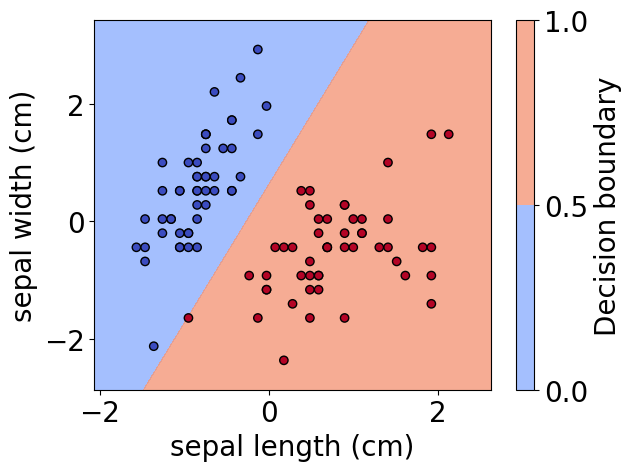

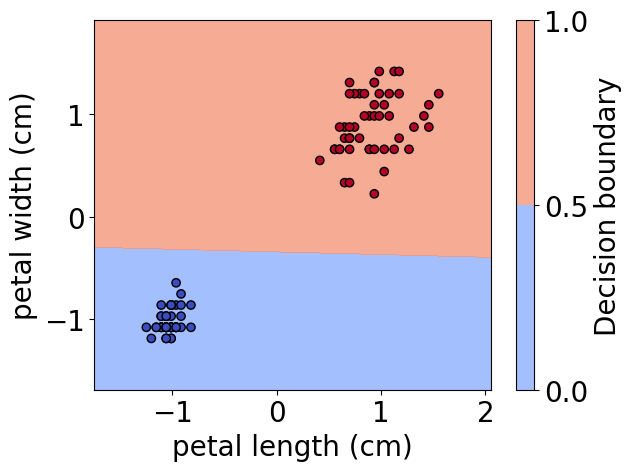

In [105]:
# Combine train and test data for plotting
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

# Set font properties
plt.rcParams.update({"font.size": 20})

# Plot the decision boundary and points
plt.figure()

# Model data (hypothetical)
model_weights = np.array([weights[0], weights[1]])  # Replace with your actual weights
model_bias = bias  # Replace with your actual bias
# Plot the decision boundary and points
plot_decision_boundary(
    X_combined, y_combined, model_weights, model_bias, indice_f1=0, indice_f2=1
)
plt.show()

model_weights = np.array([weights[2], weights[3]])  # Replace with your actual weights
plot_decision_boundary(
    X_combined, y_combined, model_weights, model_bias, indice_f1=2, indice_f2=3
)
plt.show()

#### Defining Training Functions (Backpropagation)

Below are the functions responsible for updating weights and bias.

In [88]:
def mean_squared_error(y_pred, y_true):
    """
    Calculates the Mean Squared Error (MSE).
    """
    return np.mean((y_pred - y_true) ** 2)


def forward(X, weights, bias):
    """
    Performs the forward pass through a simple perceptron.
    """
    z = np.dot(X, weights) + bias  # Linear combination of inputs with weights and bias
    return sigmoid(z)  # Apply the sigmoid function to get the probability


def backpropagation(X, y, y_pred, weights, bias, learning_rate):
    """
    Backpropagation Algorithm.

    :param X: Feature matrix of the input data.
    :param y: Vector of true labels.
    :param y_pred: Vector of model predictions.
    :param weights: Current weight vector of the model.
    :param bias: Current bias of the model.
    :param learning_rate: Learning rate, controls the step size in the update.
    :return: Tuple containing the updated weights and bias.
    """
    # Error derivative
    error = y_pred - y
    d_error = derivada_erro_quadratico_medio(y_pred, y)

    # Activation function derivatives
    z = np.dot(X, weights) + bias
    d_sigmoid = derivada_sigmoid(z)

    # Gradients
    d_weights = np.dot(X.T, d_error * d_sigmoid)
    d_bias = np.sum(d_error * d_sigmoid)

    # Update weights and bias
    weights -= learning_rate * d_weights
    bias -= learning_rate * d_bias

    return weights, bias

Let's start the training

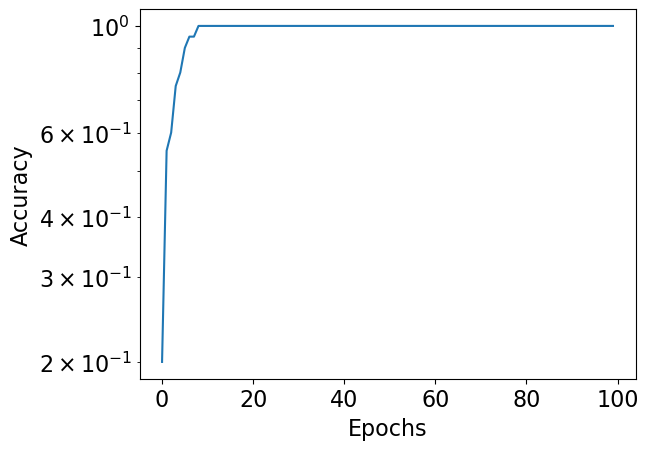

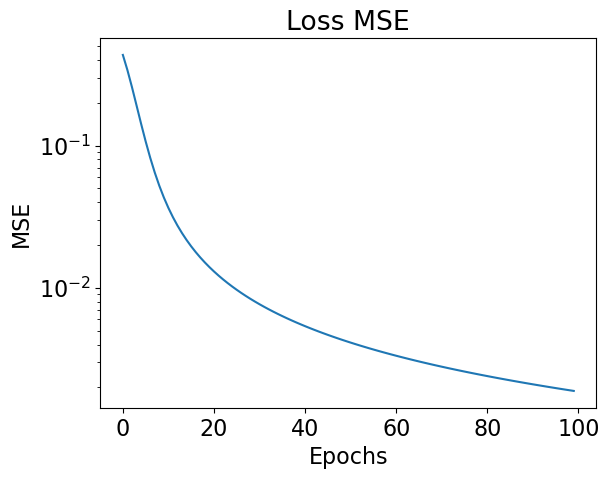

In [89]:
loss_accuracy = []
loss_mse = []

# Model training
for _ in range(100):
    for x, y in zip(X_train, y_train):
        y_pred = forward(x, weights, bias)
        weights, bias = backpropagation(x, y, y_pred, weights, bias, learning_rate=0.01)

    y_pred_test = [forward(x, weights, bias) > 0.5 for x in X_test]
    accuracy = accuracy_score(y_test, y_pred_test)
    y_pred_test = [forward(x, weights, bias) for x in X_test]
    mse = mean_squared_error(y_test, y_pred_test)

    loss_accuracy.append(accuracy)
    loss_mse.append(mse)

# Set font properties
plt.rcParams.update({"font.size": 16})

# Plot the decision boundary and points
plt.figure()
# Evaluation
plt.plot(loss_accuracy)
plt.yscale("log")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.show()

plt.title("Loss MSE")
plt.plot(loss_mse)
plt.yscale("log")
plt.ylabel("MSE")
plt.xlabel("Epochs")
plt.show()

## Visualization of the Trained Network
Let's visualize the results of the trained parameters

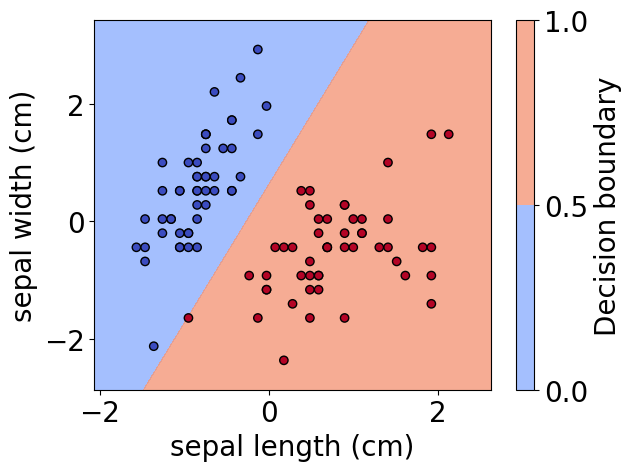

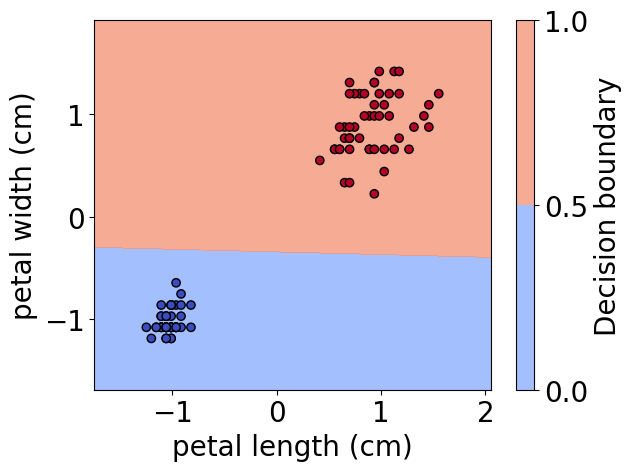

In [90]:
# Combine train and test data for plotting
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

# Model data (hypothetical)
model_weights = np.array([weights[0], weights[1]])  # Replace with your actual weights
model_bias = bias  # Replace with your actual bias

# Set font properties
plt.rcParams.update({"font.size": 20})

# Plot the decision boundary and points
plt.figure()
plot_decision_boundary(
    X_combined, y_combined, model_weights, model_bias, indice_f1=0, indice_f2=1
)
plt.xlabel(f"{iris.feature_names[0]}")
plt.ylabel(f"{iris.feature_names[1]}")
plt.show()

model_weights = np.array([weights[2], weights[3]])  # Replace with your actual weights
plt.figure()
plot_decision_boundary(
    X_combined, y_combined, model_weights, model_bias, indice_f1=2, indice_f2=3
)
plt.xlabel(f"{iris.feature_names[2]}")
plt.ylabel(f"{iris.feature_names[3]}")
plt.savefig("decision_boundary2.png", dpi)
plt.show()